In [ ]:
import nibabel as nib
import numpy as np
import cv2
import os, glob


**READ MRI Volume**

In [ ]:
def readImageVolume(imgPath, normalization = False):
    if normalization : 
      img = normalizeImageIntensityRange(nib.load(imgPath).get_fdata())
    else : 
      img = nib.load(imgPath).get_fdata()
    return img

**NORMALIZATION**

In [ ]:
def normalizeImageIntensityRange(img):
    H_MAX = np.max(img)
    H_MIN = np.min(img) 
    H_RANGE = H_MAX - H_MIN
    img[img < H_MIN] = H_MIN
    img[img > H_MAX] = H_MAX
    return (img - H_MIN)/H_RANGE


**SAVE SLICE AND VOLUME**

In [ ]:
def saveSlice(img, path, filename):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{filename}.png')
    cv2.imwrite(fout, img)
    print(f'Slice saved: {fout}')
    

In [ ]:
def saveSliceMask(img, path, filename):
    img[img>0.5]=1
    img[img<0.5]=0
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{filename}.png')
    cv2.imwrite(fout, img)
    print(f'Slice saved: {fout}')
    

In [ ]:
Slice_X = True
Slice_Y = False
Slice_Z = False

def sliceSaveVolume(vol, path, filename):
    (xdim, ydim, zdim) = vol.shape
    cpt = 0
    if Slice_X:
        cpt += xdim
        for i in range(70,150):
            saveSlice(vol[i,:,:], path, filename+f'-slice{str(i)}_x')

    if Slice_Y:
        cpt += ydim
        for i in range(ydim):
            saveSlice(vol[:,i,:], path, filename+f'-slice{str(i)}_y')

    if Slice_Z:
        cpt += zdim
        for i in range(zdim):
            saveSlice(vol[:,:,i], path, filename+f'-slice{str(i)}_z')
    return cpt


In [ ]:
Slice_X = True
Slice_Y = False
Slice_Z = False

def sliceSaveVolumeM(vol, path, filename):
    (xdim, ydim, zdim) = vol.shape
    cpt = 0
    if Slice_X:
        cpt += xdim
        for i in range(70,150):
            saveSliceMask(vol[i,:,:], path, filename+f'-slice{str(i)}_x')

    if Slice_Y:
        cpt += ydim
        for i in range(ydim):
            saveSlice(vol[:,i,:], path, filename+f'-slice{str(i)}_y')

    if Slice_Z:
        cpt += zdim
        for i in range(zdim):
            saveSlice(vol[:,:,i], path, filename+f'-slice{str(i)}_z')
    return cpt


**RUN SLICING**

In [ ]:
import os 
dataInputPath ='/content/drive/My Drive/Tra/'

dataOutputPath ='/content/drive/My Drive/2Dtest/'

imageSliceOutput = os.path.join(dataOutputPath, 'img/img')
maskSliceOutput = os.path.join(dataOutputPath, 'mask/img')


In [ ]:
for index, filename in enumerate(sorted(glob.iglob(dataInputPath + '*/' +'001_brain.nii.gz'))):
    img = readImageVolume(filename, True)

    nSlices = sliceSaveVolume(img, imageSliceOutput, 'brain'+str(index))
    print(f'\n{filename}, {nSlices} slices created \n')


Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice60_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice61_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice62_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice63_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice64_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice65_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice66_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice67_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice68_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice69_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice70_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice71_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img/brain0-slice72_x.png
Slice saved: /content/drive/My Drive/2Dtest/img/img

In [ ]:
for index, filename in enumerate(sorted(glob.iglob(dataInputPath  + '*/' +'001_brain_pve_2.nii.gz'))):
    img = readImageVolume(filename)

    nSlices = sliceSaveVolumeM(img, maskSliceOutput, 'brain'+str(index))
    print(f'\n{filename}, {nSlices} slices created \n')


Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice60_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice61_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice62_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice63_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice64_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice65_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice66_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice67_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice68_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice69_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice70_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice71_x.png
Slice saved: /content/drive/My Drive/2Dtest/mask/img/brain0-slice72_x.png
Slice saved: /content/drive/My Drive/2

**TRAINING**


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator 


def seg_gen_train(img_path, msk_path, img_size, batch_size):
    datagenerator = ImageDataGenerator(rescale=1./255)
    gen_params = dict(target_size=img_size, class_mode=None, color_mode='grayscale', batch_size=batch_size, seed = 909 )
    img_generator = datagenerator.flow_from_directory(img_path, **gen_params)
    msk_generator = datagenerator.flow_from_directory(msk_path, **gen_params)
    return zip(img_generator, msk_generator)

train_gen = seg_gen_train('/content/drive/My Drive/2Dtest/img/', '/content/drive/My Drive/2Dtest/mask/',(256,256),64)

Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


In [ ]:
def display(display_list):
  plt.figure(figsize=(5,5))
  title = ['input Mask', 'True Mask', 'Predicted mask']
  for i in range(len(display_list)):
    plt.subplot(1,len(display_list),i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]), cmap = 'gray')
  plt.show()
  return tf.keras.preprocessing.image.array_to_img(display_list[0]), tf.keras.preprocessing.image.array_to_img(display_list[1])


In [ ]:
def show_dataset(datagen, num =1):
  for i in range(0, num):
    image, mask = next(datagen)
    a,b = display([image[0], mask[0]])
  return a,b

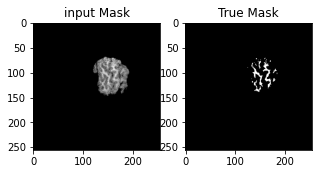

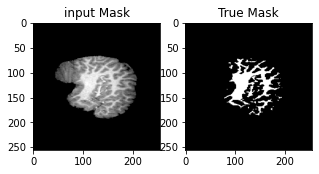

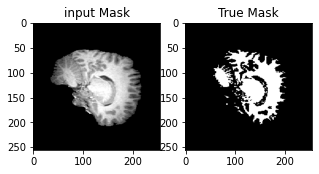

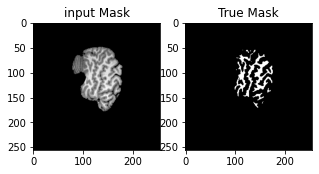

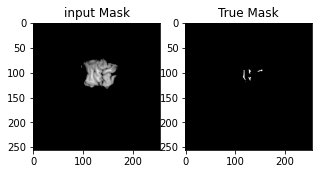

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
i, m = show_dataset(train_gen,5)


In [ ]:

from tensorflow import keras  
import tensorflow.keras.layers as layers


def UNet(in_channels, out_channels, n_levels, initial_features, n_blocks, IMAGE_HEIGHT, IMAGE_WIDTH):
   
    inputs = layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, in_channels))
    
    x = inputs
    
    skips_connections = {}
    for level in range(n_levels):
        for _ in range(n_blocks):
            x = layers.Conv2D(initial_features * 2 ** level, kernel_size=3, activation='relu', padding='same')(x)
        if level < n_levels - 1:
            skips_connections[level] = x 
            x = layers.MaxPool2D(2)(x) 
            
    for level in reversed(range(n_levels-1)): 
        x = layers.Conv2DTranspose(initial_features * 2 ** level, strides=2, kernel_size=3, activation='relu', padding='same')(x)
        x = layers.Concatenate()([x, skips_connections[level]]) 
        for _ in range(n_blocks):
            x = layers.Conv2D(initial_features * 2 ** level, kernel_size=3, activation='relu', padding='same')(x)
            
    # output
    activation = 'sigmoid' if out_channels == 1 else 'softmax'
    x = layers.Conv2D(out_channels, kernel_size=1, activation=activation, padding='same')(x)
    
    return keras.Model(inputs=[inputs], outputs=[x], name=f'UNET-Level{n_levels}-Features{initial_features}')

In [ ]:
import tensorflow as tf
epochs = 30
epoch_step_train = 500 //64


model = UNet(in_channels = 1 , out_channels = 1, n_levels = 4, initial_features = 32, n_blocks = 2, IMAGE_HEIGHT = 256, IMAGE_WIDTH = 256)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

with tf.device('/device:GPU:0'):
  model.fit(train_gen, steps_per_epoch=epoch_step_train,epochs=epochs)

Model: "UNET-Level4-Features32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 256, 256, 32) 320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_30[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_31[0][0]                  
_____________________________________________________________________________

In [ ]:
model.save('/content/drive/My Drive/unet_datagen_pve2.h5')